# Introduction
Deep learning, a subset of machine learning, has become the backbone of numerous applications in recent years, particularly in the domain of image classification. The success stories surrounding deep learning in tasks such as facial recognition, disease identification from medical images, and even self-driving cars, underscore its significance. However, with the plethora of architectures, optimization techniques, and best practices available, it can often become overwhelming for practitioners to create an efficient model.

This notebook aims to be a comprehensive guide that addresses this challenge. By embarking on a journey that investigates different model architectures, regularization methods, learning rate adjustments, early stopping mechanisms, and data augmentation techniques, we aim to equip the user with practical insights into the effects and implications of each strategy. We believe that with a deeper understanding of these techniques, one can effectively apply them to a variety of datasets and problems, achieving state-of-the-art results while also understanding the underlying mechanics.

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping as ES
from IPython.display import clear_output as cls


import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
batchSize = 32
imageShape = (224, 224)
epochs = 10
channels = 3

In [ ]:
train_dir = "/kaggle/input/tomatoleaf/tomato/train/"
val_dir = "/kaggle/input/tomatoleaf/tomato/val/"

In [ ]:
class_names = sorted(os.listdir(train_dir))
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
class_dis = [len(os.listdir(train_dir + name)) for name in class_names]
class_dis

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [ ]:
fig = px.pie(names=class_names, values=class_dis, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of classes", "x":0.50}})
fig.show()

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255.), validation_split=0.2)
val_gen = ImageDataGenerator(rescale=(1./255.))

In [ ]:
train_ds = train_gen.flow_from_directory(train_dir,target_size=imageShape,batch_size=batchSize, subset='training', class_mode='categorical')
val_ds = train_gen.flow_from_directory(train_dir,target_size=imageShape,batch_size=batchSize, subset='validation', class_mode='categorical')

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
test_ds = val_gen.flow_from_directory(val_dir,target_size=imageShape,batch_size=batchSize, class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [ ]:
def plot_images(data, class_names):

    r, c = 3, 4
    imgLen = r*c

    plt.figure(figsize=(20, 15))
    i = 1

    for images, labels in iter(data):


        id = np.random.randint(len(images))
#         img = images[id].numpy().astype('uint8')
        img = tf.expand_dims(images[id], axis=0)
        lab = class_names[np.argmax(labels[id])]

        plt.subplot(r, c, i)
        plt.imshow(img[0])
        plt.title(lab)
        plt.axis('off')
        cls()

        i+=1
        if i > imgLen:
            break
    plt.show()


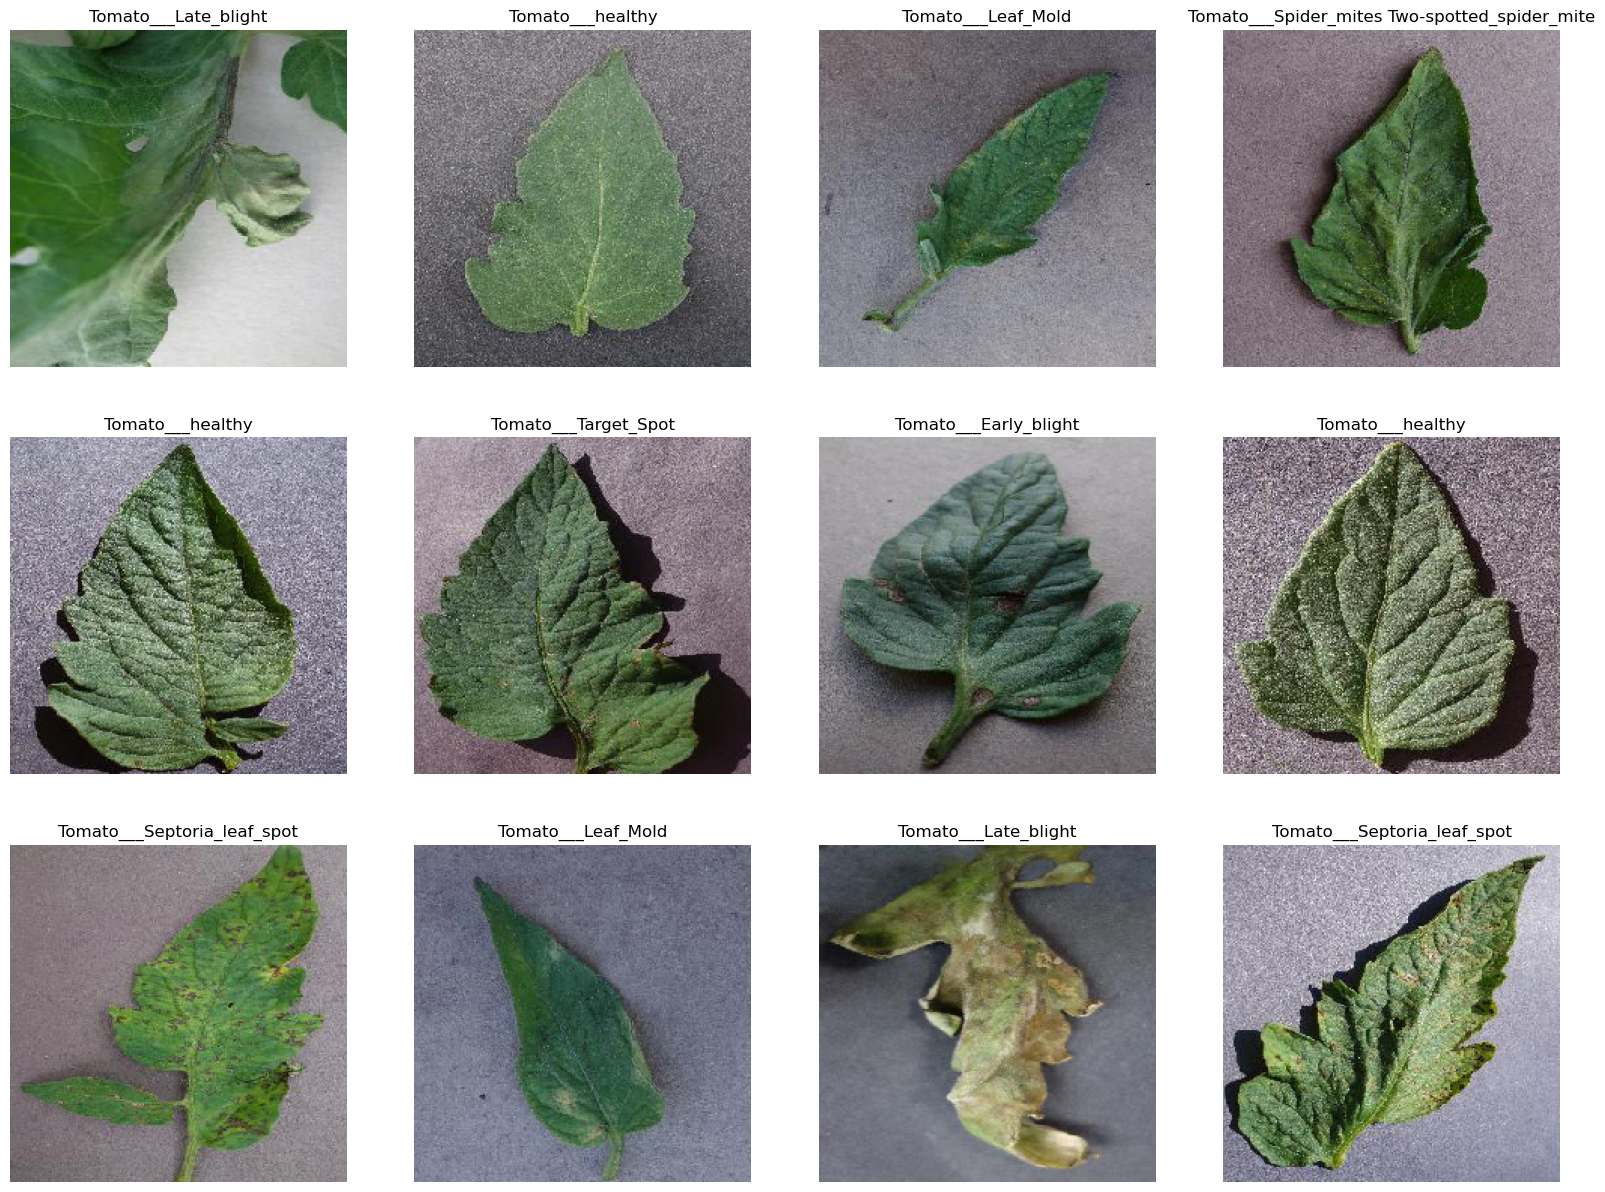

In [ ]:
plot_images(train_ds, class_names)

In [ ]:
def get_model():

    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layers in base_model.layers:
        layers.trainable = False

    base_model_output = base_model.output

    x = Flatten()(base_model_output)
    x = Dense(512, activation='relu')(x)
    x = Dense(len(class_names), activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

In [ ]:
model = get_model()

model.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
history = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=10,
                   steps_per_epoch=len(train_ds),
                   validation_steps=len(val_ds),
                   callbacks=[ES(monitor="val_loss", patience=5)])

Epoch 1/10
250/250 [==============================] - 81s 280ms/step - loss: 1.8168 - accuracy: 0.5286 - val_loss: 0.8916 - val_accuracy: 0.6920
Epoch 2/10
250/250 [==============================] - 33s 134ms/step - loss: 0.6942 - accuracy: 0.7620 - val_loss: 0.6629 - val_accuracy: 0.7700
Epoch 3/10
250/250 [==============================] - 34s 135ms/step - loss: 0.4658 - accuracy: 0.8411 - val_loss: 0.5675 - val_accuracy: 0.8100
Epoch 4/10
250/250 [==============================] - 33s 133ms/step - loss: 0.3228 - accuracy: 0.8901 - val_loss: 0.4704 - val_accuracy: 0.8375
Epoch 5/10
250/250 [==============================] - 32s 130ms/step - loss: 0.2412 - accuracy: 0.9196 - val_loss: 0.3996 - val_accuracy: 0.8650
Epoch 6/10
250/250 [==============================] - 34s 135ms/step - loss: 0.1512 - accuracy: 0.9540 - val_loss: 0.5073 - val_accuracy: 0.8435
Epoch 7/10
250/250 [==============================] - 34s 134ms/step - loss: 0.1017 - accuracy: 0.9716 - val_loss: 0.4201 - val_ac

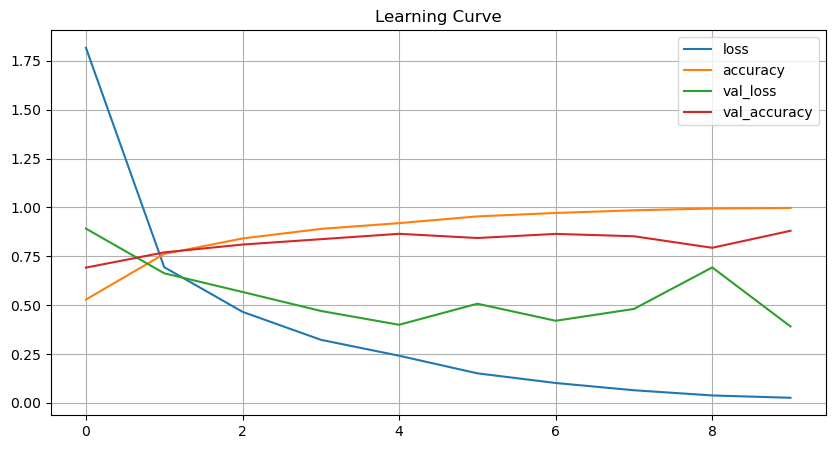

In [ ]:
learningcurve = pd.DataFrame(history.history)
learningcurve.plot(figsize=(10, 5))
plt.title("Learning Curve")
plt.grid()

In [ ]:
def predictImages(data, class_names, model):

    r, c = 3, 4
    imgLen = r*c
    plt.figure(figsize=(20, 15))
    i = 1

    for images, labels in iter(data):

        id = np.random.randint(len(images))
        img = tf.expand_dims(images[id], axis=0)

        plt.subplot(r, c, i)
        plt.imshow(img[0])

        predicted = model.predict(img)
        predicted = class_names[np.argmax(predicted)]
        actual = class_names[np.argmax(labels[id])]

        plt.title(f"Actual: {actual}\nPredicted: {predicted}")
        plt.axis('off')
        cls()

        i+=1
        if i > imgLen:
            break

    plt.show()

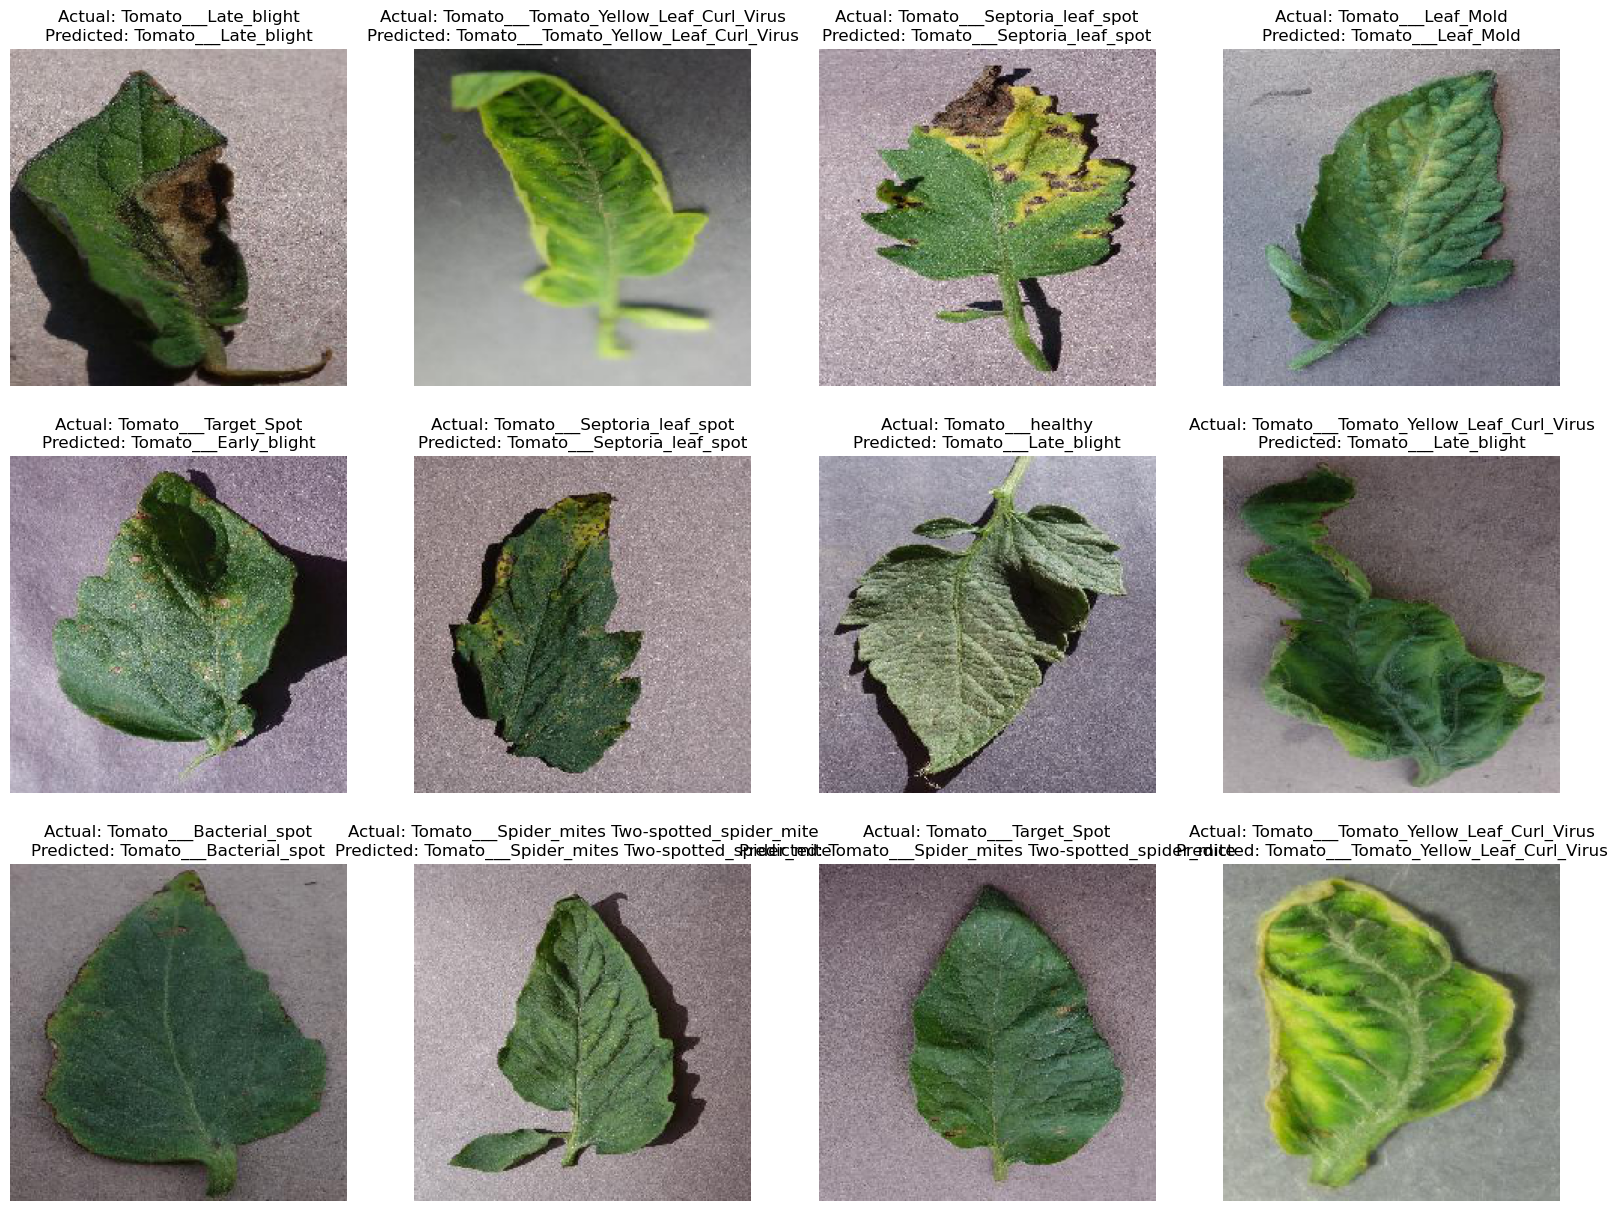

In [ ]:
predictImages(test_ds, class_names, model)

# Conclusion
In our expedition through the labyrinth of deep learning techniques, we've confronted several methodologies, each with its unique set of strengths, weaknesses, and applications. It's essential to remember that while there are numerous tools and techniques at our disposal, the effectiveness of each depends on the specific problem, data characteristics, and desired outcomes.

From our exploration:

a. Model Architectures: We learned that the right architecture choice could heavily influence the model's performance. While some architectures may excel in certain tasks due to their depth or specific design considerations, they might be overkill or inappropriate for others.

Regularizations and

B. Optimizations: Regularizing the model and optimizing its learning path demonstrated significant impacts on preventing overfitting and improving convergence rates. These tools are paramount in achieving generalizable models.

C. Learning Rate Adjustments: The learning rate dictates how quickly a model adapts to the data. Adapting it can lead to faster convergence and better generalization.

D. Data Augmentation: By artificially enhancing our dataset, we can make our model more robust and less prone to overfitting, especially when the original data is limited.

E. Callbacks and Early Stopping: These provide practical tools to monitor and enhance model training, ensuring we achieve optimal results without wasting computational resources.

In conclusion, deep learning, though immensely powerful, requires a meticulous approach. Each choice made during the modeling process can profoundly affect outcomes. Therefore, it's crucial to not just know the techniques but also understand their implications. As with many things in science and technology, there's no "one-size-fits-all." Instead, success in deep learning demands a blend of knowledge, experimentation, and intuition.